# 주성분분석 PCA
- (principal component analysis)
- 분포의 주 성분을 분석하는 방법
- 주성분이란 그 방향으로 데이터들의 분산이 가장 큰 방향벡터를 의미
- 가장 기본적인 주성분 x축은 (1,0) y축은 (0,1)이지만 분산을 고려하면 달라짐
- 차원 축소를 위해 사용


In [1]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [2]:
faces_all = fetch_olivetti_faces()
# 얼굴 데이터셋  (orl face database 구글링) 전체 데이터 400개

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\user\scikit_learn_data


In [3]:
X= faces_all.data
y= faces_all.target

In [4]:
print(X.shape)
# (400, 4096) 샘플 400개고 디맨션 4096개인 데이터
print(y)
# 순차적으로 10개가 첫번째사람,,, 40번째 사람까지

(400, 4096)
[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 31 31
 31 31 31 31 31 31 31 31 32 32 32 32 32

In [5]:
print(X[0])

[0.30991736 0.3677686  0.41735536 ... 0.15289256 0.16115703 0.1570248 ]


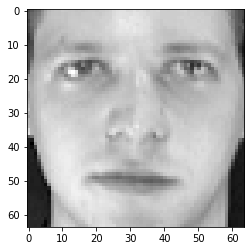

In [8]:
# plt.imshow(X[0])
# 플랏함수의 imshow 이미지함수 출력하는 함수: 색 설정해줘야함
# X[0]: 1번째사람. 에러이유: 실제 숫자값은 픽셀의 강도 의미. 1차원이라 영상으로 보려면 reshape 해줘야함

plt.imshow(X[0].reshape(64,64), cmap='gray')

In [12]:
X_train, X_test, Y_train, Y_test= train_test_split(X, y, test_size=0.3)
# train_test_split함수: sk모듈 안에, 전체 데이터중에서 트레인셋과 세스트셋으로 분할해줌
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
# 성능평가는 training에 포함되지 않은 데이터로 해야함 (트레이닝 셋에있는걸로 하면 무조건 좋게나와서)

(280, 4096)
(120, 4096)
(280,)
(120,)


In [13]:
log_reg= LogisticRegression()
log_reg.fit(X_train, Y_train)

C:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
log_reg.predict(X_test)
# 테스트데이터는 학습에 사용하지 않은 데이터라서 이걸로 예측해야댐. 얘랑 와이테스트랑 비교

array([26, 28, 15, 34, 15, 13, 12,  5,  0, 37,  8, 19, 13, 32, 35, 35,  6,
       20,  0,  3, 30, 24,  5,  5, 33, 22, 16, 31, 13, 29, 24,  7, 10, 17,
       36,  2, 18, 14, 22,  5, 15,  9, 30, 10,  9, 30, 32,  6, 17, 22,  6,
       33, 36,  8, 37, 28,  2, 11,  8, 33, 17, 38, 36,  2,  0, 11, 15, 10,
        6,  8, 23,  2, 16, 18, 24, 19, 29, 29,  9, 36, 23, 30, 30, 12,  7,
        5, 32, 12, 35, 20,  0, 16,  9, 27,  9, 16, 39, 28, 20, 12, 30, 18,
       34, 11, 22, 32, 18, 17, 30, 34, 32,  4, 19, 33, 14, 13,  0, 25, 17,
       35])

In [15]:
log_reg.predict(X_test) == Y_test
# 예측한값과 정답 비교해서 맞추면 트루 틀리면 f

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [17]:
np.mean(log_reg.predict(X_test) == Y_test)
# 평균 구하면 인식률 나옴

0.95

In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(X, y, test_size=0.3)
에서 0.3을 0.5로 바꾸면 한사람당 5장만 학습데이터로 쓰는걸로 되는거라 인식률 떨어짐!
같은 0.5여도 할때마다 다르게 나오는데 - 왜그럴까요
학습알고리즘은 데이터가 주어져있으면 동일하게 나오는데, train_test_split 얘가 랜덤하게 데이터 나누기 때문에 인식률이 매번 다르게 나옴--> 그래서 성능평가는 믿을수가없음


4096차원을 50개정도의 차원으로 줄이려고 하는데 성능에 영향미치지않으면서 의미없는 차원만 줄이려면
의미가 있다는: 축에 기반으로 해서 분포가 큰 축이 주축이 되는데, 분포가 큰 축은 남기고 분포가 작은 축은 버린다는거
대다수의 자연데이터는 분포가 치우쳐져 있기 때문에 가능한 방법: 분포가 치우쳐져있지 않으면 쓰면안돼!
    배리언스가 큰 축부터 버리겠다는 거

In [43]:
pca= PCA(n_components=100)   
#4096차원을->140 차원으로줄이겠다 선언, 
# 200개까지는 variance가 있는데 201부터는 variance가 0이라서 계산불가(통계학적으로 의미있는 데이터는 200까지다)
pca.fit(X_train)    #y축 레이블이 없는 상태에서 데이터를 보고 버리겠다:그래서 비지도학습방법

print(X_train.shape)

(280, 4096)


In [33]:
lowX=pca.transform(X_train)
print(lowX.shape)

(280, 100)


In [34]:
log_reg.fit(lowX, Y_train)

C:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
log_reg.predict(X_test)
# 에러: 학습할때는 50디맨션이였는데  테스트는 4096이면 안맞으니까 차원 줄여줘야함

ValueError: X has 4096 features per sample; expecting 140

In [35]:
lowX_test= pca.transform(X_test)
np.mean(log_reg.predict(lowX_test) ==Y_test)
# 줄이기 이전과 결과 크게 다르지 않음 확인

0.95

In [36]:
print(pca.singular_values_)
# 각 축의 var


[72.82997   56.398647  40.897625  32.04539   27.156189  26.817442
 23.378376  21.876078  21.05872   19.763025  18.545198  17.712927
 16.368235  16.076632  15.206701  14.835132  13.516577  13.435225
 13.087381  12.444234  12.320767  11.792413  11.687266  11.378847
 11.156993  10.724904  10.554758  10.300083  10.064583   9.673587
  9.273372   9.112778   8.978027   8.654193   8.612388   8.391019
  8.274775   8.074033   7.974146   7.7776213  7.657758   7.598458
  7.4068265  7.331516   7.129767   7.08556    6.984052   6.936925
  6.812942   6.7734394  6.6818805  6.6017447  6.4945946  6.490067
  6.380987   6.312023   6.2437577  6.1448426  6.1233525  6.0163293
  5.9117436  5.883248   5.859629   5.8147254  5.7769594  5.7244983
  5.61827    5.5804873  5.4942894  5.4643     5.4355006  5.4033523
  5.220975   5.19025    5.139617   5.118873   5.0292735  5.0187097
  4.9553676  4.9484735  4.865198   4.8495436  4.800741   4.7831936
  4.7234     4.6487913  4.603964   4.5800257  4.554587   4.484145
  4.4

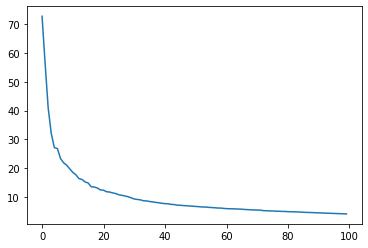

In [37]:
plt.plot(pca.singular_values_)
# 1째값은 의미 큰데 내려갈수록 variance값이 0에 가까우니까,, 뒤쪽 0에 가까운 값은 생략해도되겠다

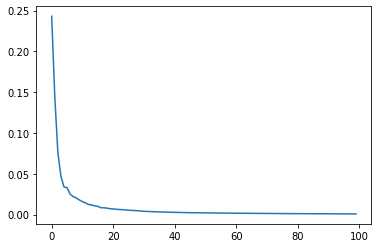

In [40]:
plt.plot(pca.explained_variance_ratio_)
# var값을 전체 var더한걸로 나누는 함수: 전체중에 몇을 차지하는지 알수있게되고

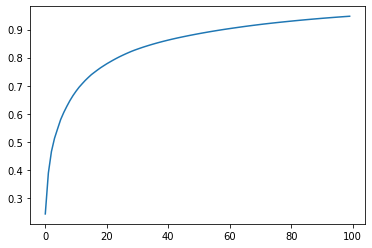

In [42]:
cs=np.cumsum(pca.explained_variance_ratio_)
# cumsum: 누적해서 보는거 (다더하면1이되겠지)
plt.plot(cs)

In [44]:
두가지를 섞어서 사용한거 pca할때는 y안 썼고 logisticregression할때는 y썼다 
위 그래프 통해 객관적인 실험기준 제시 가능, 모든데이터셋에 상관없이 variance를 보고 ~~에 해당하는 축을 설정했다. 는 식으로

SyntaxError: invalid syntax (<ipython-input-44-2b555a510e86>, line 1)

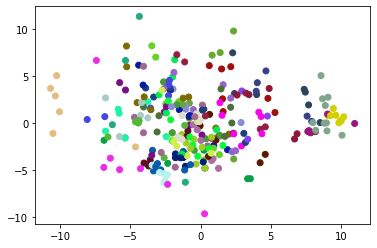

In [45]:
col= np.random.rand(40,3)
colors= [col[i] for i in Y_train]
plt.scatter(lowX[:,0], lowX[:,1], c=colors)